# Chapitre 3

In [1]:
#Load DS MNIST

from numpy import genfromtxt

file_path_name = '.\datasets\mnist\mnist_complete.csv'

my_data = genfromtxt(file_path_name, delimiter=',')
my_data = my_data.astype(int)



In [4]:
import numpy as np

y = my_data[:,0]
X = my_data[:,1:]
print(y)
print(y.shape)
print(X.shape)

[5 0 4 ... 4 5 6]
(70000,)
(70000, 784)


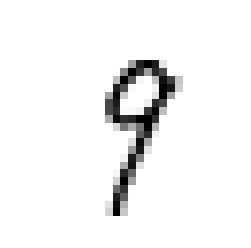

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[1284]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [31]:
def plot_digit(matrix_values):
    some_digit_image = matrix_values.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
    plt.axis("off")
    plt.show()

In [6]:
y[36000]

9

# Division en train test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

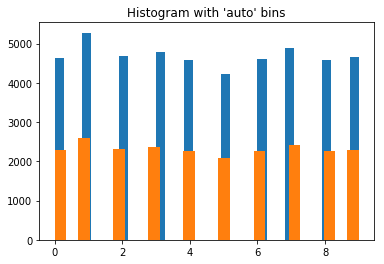

In [8]:
#See the distribution of the values in the train and test class
import matplotlib.pyplot as plt
plt.hist(y_train, bins='auto')
plt.title("Histogram with 'auto' bins")
plt.hist(y_test, bins='auto')
plt.show()

In [9]:
quantity_samples = len(y_train)
shuffle_index = np.random.permutation(quantity_samples)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [10]:
#Juste por les 5
y_train_5 = (y_train == 5)  # vrai pour les 5, faux pour le reste.
y_test_5 = (y_test == 5)
print(y_train_5)
print(y_test_5)

[False False False ... False False  True]
[False False False ... False  True False]


# SGDClassifier

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
print(type(X_train[456]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


<class 'numpy.ndarray'>


In [12]:
print(type(X_train[456]))
sgd_clf.predict([X_train[456]])

<class 'numpy.ndarray'>


array([False])

# Mesurer la précision de notre modèle

## Validation croisée faite main

In [13]:
#implementation de notre methode

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]    
    y_train_folds = (y_train_5[train_index])    
    X_test_fold = X_train[test_index]    
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)    
    y_pred = clone_clf.predict(X_test_fold)    
    n_correct = sum(y_pred == y_test_fold)    
    print(n_correct / len(y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9539465268005629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9584212883003902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9549670568668841


In [14]:
#Utilisation des recourrses de SK-learn
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.95394653, 0.95842129, 0.95496706])

In [15]:
#Classificateur qui predit "non-5"
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90821287, 0.90955031, 0.91166123])

# Confusion matrix

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[41424,  1246],
       [  828,  3402]], dtype=int64)

### Precision and recall

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_value = precision_score(y_train_5, y_train_pred)     # == 4344 / (4344 + 1307)
print(precision_value)
recall_value = recall_score(y_train_5, y_train_pred)  # == 4344 / (4344 + 1077)
print(recall_value)

0.7319277108433735
0.8042553191489362


In [18]:
#Modifications dans le threshold

In [19]:
y_scores = sgd_clf.decision_function([X_train[45478]]) #true
#y_scores = sgd_clf.decision_function([X_train[4596]]) #false
y_scores
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [20]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [21]:
#Obtenir les scores de chaque observation au lieu des predictions

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

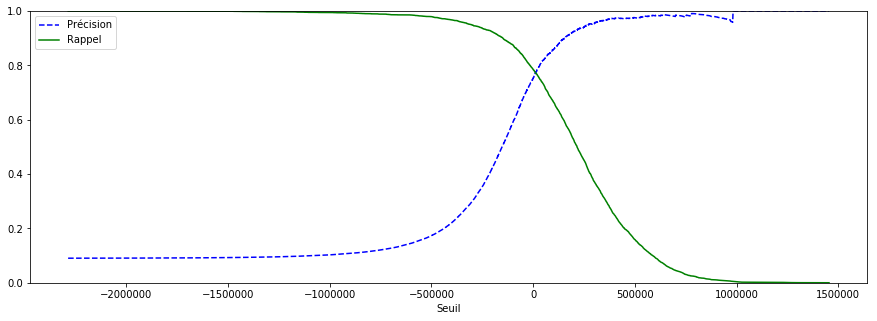

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):  
    plt.figure(figsize=(15,5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Précision")    
    plt.plot(thresholds, recalls[:-1], "g-", label="Rappel")    
    plt.xlabel("Seuil")    
    plt.legend(loc="upper left")    
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [25]:
print(precisions)
print(recalls)

[0.09052195 0.09050248 0.09050442 ... 1.         1.         1.        ]
[1.00000000e+00 9.99763593e-01 9.99763593e-01 ... 4.72813239e-04
 2.36406619e-04 0.00000000e+00]


In [26]:
#compromis entre precision et rappel

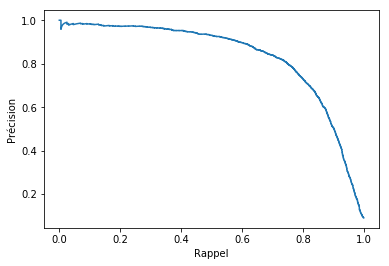

In [27]:
plt.ylabel('Précision')
plt.xlabel('Rappel')
plt.plot(recalls,precisions)

In [28]:
#seuil a 90% de precision
y_train_pred_90 = (y_scores > 70000)
precision_score_90 = precision_score(y_train_5, y_train_pred_90)
recall_score_90 = recall_score(y_train_5, y_train_pred_90)

print(precision_score_90)
print(recall_score_90)

0.8378834787503519
0.7037825059101654


In [29]:
#courbe ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

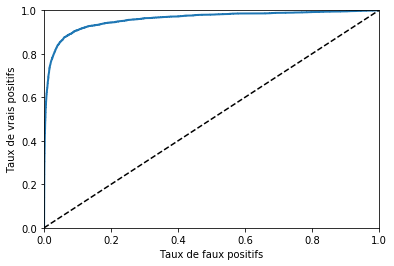

In [30]:
def plot_roc_curve(fpr, tpr, label=None):    
    plt.plot(fpr, tpr, linewidth=2, label=label)    
    plt.plot([0, 1], [0, 1], 'k--')    
    plt.axis([0, 1, 0, 1])    
    plt.xlabel('Taux de faux positifs')    
    plt.ylabel('Taux de vrais positifs')
plot_roc_curve(fpr, tpr)
plt.show()

In [31]:
#Air sous la courbe roc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)


0.9592597375759098

## Test avec random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")

#Il nous faut les prédictions, pas les probabilité
y_scores_forest = y_probas_forest[:, 1] # score = proba de la classe positive
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


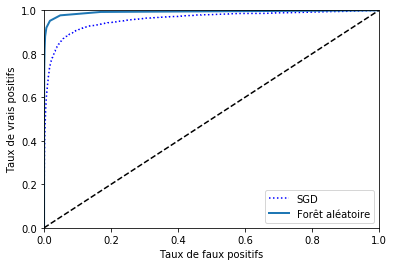

In [33]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Forêt aléatoire")
plt.legend(loc="lower right")
plt.show()

In [34]:
roc_auc_score(y_train_5, y_scores_forest)

0.9923072416217483

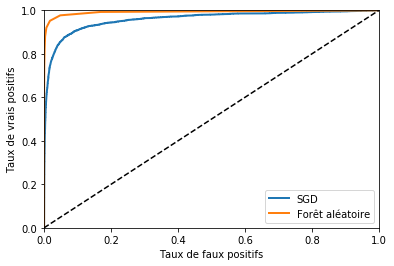

In [35]:
plt.plot(fpr, tpr, linewidth=2, label="SGD")    
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Forêt aléatoire")   
plt.plot([0, 1], [0, 1], 'k--')    
plt.axis([0, 1, 0, 1])    
plt.xlabel('Taux de faux positifs')    
plt.ylabel('Taux de vrais positifs')
plt.legend(loc="lower right")
plt.show()

In [36]:
#Convertir les scores en predictions reels
print(y_train_5)
print(y_scores_forest)
y_scores_forest_90 = (y_scores_forest > 0.5)


precision_score_90 = precision_score(y_train_5, y_scores_forest_90)
recall_score_90 = recall_score(y_train_5, y_scores_forest_90)

print(precision_score_90)
print(recall_score_90)

[False False False ... False False False]
[0. 0. 0. ... 0. 0. 0.]
0.9815655133295519
0.8182033096926714


# Classification Multi-classe

In [37]:
sgd_clf.fit(X_train, y_train)  # y_train, pas y_train_5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
prediction = sgd_clf.predict([X_train[4856]])
print(prediction)
some_digit_scores = sgd_clf.decision_function([X_train[4856]])
print(some_digit_scores)
max_value = np.argmax(some_digit_scores)
print(max_value)
print(sgd_clf.classes_)
print(sgd_clf.classes_[7])

[6]
[[ -712373.64950119 -1006080.04063073  -583542.99914242  -920689.89842933
   -434336.73168626 -1173714.15942612   405493.26672043  -835397.23420499
   -443198.61327947  -422749.04262302]]
6
[0 1 2 3 4 5 6 7 8 9]
7


## Forcer OvO ou OvA

In [39]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [40]:
prediction = ovo_clf.predict([X_train[4856]])
print(prediction)
len(ovo_clf.estimators_)

[6]


45

In [41]:
forest_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [42]:
prediction = forest_clf.predict([X_train[4856]])
print(prediction)
forest_clf.predict_proba([X_train[4856]])

[6]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

## CV sur toutes les classes

In [43]:
cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.86922258, 0.88945687, 0.88088643, 0.85823918, 0.87142857,
       0.86948177, 0.83617747, 0.8581182 , 0.83610755, 0.86769099])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=10, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.914164  , 0.91884984, 0.91647134, 0.90471115, 0.90767591,
       0.91256131, 0.90998294, 0.90825688, 0.90951771, 0.90994452])

# Analyse de l erreur

In [45]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [46]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[4472    2   22    8    7   39   36    6   28    5]
 [   1 5071   41   19    3   27    6    6   98    6]
 [  37   26 4200   78   69   27   54   46  130   16]
 [  35   30  115 4174    4  173   28   44  105   76]
 [  15   13   32    4 4232   11   31   24   64  146]
 [  64   30   26  152   66 3616   70   17  120   69]
 [  33   22   37    2   36   86 4348    5   37    1]
 [  22   19   56   19   37   10    7 4517   11  188]
 [  39  120   66  130   15  113   45   28 3906  111]
 [  39   24   15   72  124   24    0  142   49 4173]]


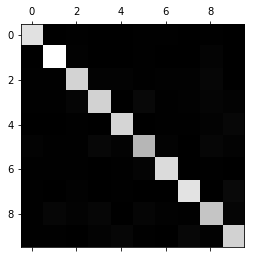

In [47]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()


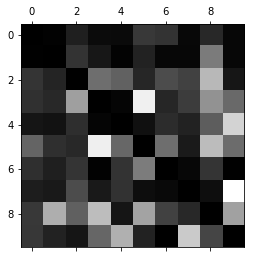

In [48]:
#Taux d erreur et non nombre d erreur
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#diagonale principale a 0
np.fill_diagonal(norm_conf_mx, 0)
#plot
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## analyser les erreurs

##### il n'est pas possible de ploter l'image mais elle est en "dure"

![title](img/plot_eg_3_5.jpg)

# Classification multi etiquettes

In [49]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
print(y_multilabel)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

[[ True False]
 [False False]
 [ True False]
 ...
 [ True False]
 [ True  True]
 [False False]]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
predictions = knn_clf.predict([X_train[4563]])
print(y_train[4563])
print(predictions)
#exemple 5

8
[[ True False]]


In [ ]:
#Prédiciton de notre modèle
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
#calculer le score F1 pour les deux classes et appliquer une moyenne "macro"
f1_score(y_train, y_train_knn_pred, average="macro")

# Classification multi-sorties

In [19]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise 
y_train_mod = X_train
y_test_mod = X_test

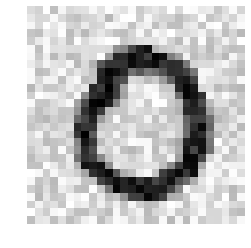

In [24]:
#ploter un chiffre
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_test_mod[1284]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

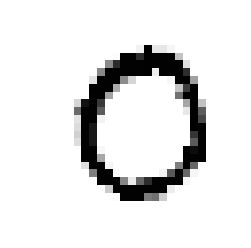

In [36]:
clean_digit = knn_clf.predict([X_test_mod[1284]])
plot_digit(clean_digit)